[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Azie88/Coachella-Tweet-Sentiment-Analysis/blob/main/Sentiment_Analysis_Coachella.ipynb)


# Sentiment Analysis Using Colab and Huggingface

What's Deep Learning? It is machine learning based on artificial neural networks in which multiple layers of processing are used to extract progressively higher level features from data.

In this project, we will fine-tune a pre-trained Deep Learning model from HuggingFace on a new dataset ([Coachella 2015 tweet sentiment](https://https://www.kaggle.com/datasets/thedevastator/twitter-sentiment-analysis-coachella-festival)) to adapt the model to our sentiment analysis classification task, then create an app to use the model and deploy the app on HuggingFace spaces.

## Install Libraries and Packages

In [1]:
!pip install datasets
!pip install evaluate
!pip install transformers[torch]
!pip install accelerate -U

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 8.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 55.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

## Import Libraries and Packages

In [2]:
#System and data handling
import os
import re
import warnings
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np

#Data Analysis & Preparation
from evaluate import load
from collections import Counter
from datasets import Dataset, DatasetDict


#Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

#Google Drive
from google.colab import drive

#Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, TrainingArguments, Trainer, TFAutoModelForSequenceClassification

#Scores
from scipy.special import softmax

# Deep learning
import torch
from torch import nn

#Huggingface
from huggingface_hub import notebook_login

## Setup

In [3]:
# Set a fixed random seed for PyTorch on CPU
torch.manual_seed(42)

# Control the seed for individual GPU operations (optional)
if torch.cuda.is_available:
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
  torch.cuda.manual_seed_all(42)


In [4]:
# Set CUDA_LAUNCH_BLOCKING for debugging
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

## Connect to Google Drive & Load Dataset

In [5]:
# Connect to your google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis NLP/Dataset/Coachella-2015-2-DFE.csv', encoding='latin-1')

## Data Understanding

In [7]:
#look at first 5 rows in train data
df.head()

coachella_sentiment coachella_yn           name  retweet_count  \
0            positive          yes       kokombil              0   
1            positive          yes  MisssTaraaa10              2   
2            positive          yes  NMcCracken805              0   
3            positive          yes         wxpnfm              1   
4            positive          yes       Caesears              0   

                                                                                                                                                text  \
0                                 #Coachella2015 tickets selling out in less than 40 minutes _√ô_¬¶_√ô___√ô___√ô√∑¬ù_√ô√é¬µ_√ô√é¬µ_√ô___√ô_¬¶ http://t.co/SmoXyteIMJ   
1                                                      RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _√ô√ì¬¥_√ô√ì¬¥_√ô√ì¬¥ #Coachella2015 http://t.co/Ov2eCJtAvR   
2                                                                                      #Coachella2015 #VIP passes secured! See you there bitchesssss   
3  Philly¬â√õ¬™s @warondrugsjams will play #Coachella2015 &amp; #GovBall2015! Watch them on Jimmy Fallon: http://t.co/wzaAE5wYNT http://t.co/sFL9I5sD20   
4                                                                 If briana and her mom out to #Coachella2015  im out with them !!! _√ô√∑√ù_√ô√∑√ù_√ô√∑√ù_√ô√ï√Ñ   

  tweet_coord tweet_created      tweet_id                  tweet_location  \
0  [0.0, 0.0]  1/7/15 15:02  5.529630e+17                             NaN   
1         NaN  1/7/15 15:02  5.529630e+17                   united states   
2         NaN  1/7/15 15:01  5.529630e+17                  Costa Mesa, CA   
3         NaN  1/7/15 15:01  5.529630e+17  Philadelphia, PA and Worldwide   
4         NaN  1/7/15 15:00  5.529630e+17                             NaN   

  user_timezone  
0         Quito  
1           NaN  
2           NaN  
3         Quito  
4           NaN

In [8]:
df.shape

(3846, 10)

In [9]:
df.dtypes

coachella_sentiment     object
coachella_yn            object
name                    object
retweet_count            int64
text                    object
tweet_coord             object
tweet_created           object
tweet_id               float64
tweet_location          object
user_timezone           object
dtype: object

In [10]:
df.isna().sum()

coachella_sentiment       0
coachella_yn              0
name                      0
retweet_count             0
text                      0
tweet_coord            3604
tweet_created             0
tweet_id                  0
tweet_location         1170
user_timezone           983
dtype: int64

In [11]:
df.coachella_sentiment.value_counts()

coachella_sentiment
positive     2283
neutral       928
negative      553
cant tell      82
Name: count, dtype: int64

In [12]:
df.text.sample(10)

3046                                                                 No matter what people complain. Ya do the line up then. #coachella2015
2353                                                                Bout to grind hard to get on the #Coachella2015 snapchat story _√ô√∑√¢_√ô√∑_
1602                                                                       Drake did say we already got spring 2015 poppin.. #Coachella2015
3156        And here it is! This year's Coachella lineup!!! _√ô√ï¬£_√ô√ï¬¥\n#coachella2015 #rockshow #rock #rockandroll¬â√õ_ http://t.co/QVl3BBZVXH
298                                                                                                       One more hour _√ô¬™¬è #Coachella2015
2979                       _√ô√∑√Ç RT @RevoltTV: Who else would you have added to the #Coachella2015 line-up? #TalkBack http://t.co/vmyR6480GD
429                                                                                            I so need to go to Coachella. #coachella2015
351                                                                                    The #Coachella2015 lineup is awesome!! I can't WAIT.
759                                              @coachella Great lineup!! Can't wait for Coachella 2015! #Coachella #Coachella2015 #lineup
3030    Can someone please explain how tickets aren't on sale until tomorrow, but all general admission is already sold out? #Coachella2015
Name: text, dtype: object

## Data Preparation

1. Drop all unnecessary columns
2. Rename *coachella_sentiment* column to *labels*
3. Remove rows with *'can't tell'* sentiment values.
4. Clean *text* column of Twitter Handles, HTML characters, URLs and other non alphabetic characters. Text is inconsistent and may affect model performance.


In [13]:
# Drop unused columns

cols_to_drop = [
    'coachella_yn', 'name', 'retweet_count', 'tweet_coord',
    'tweet_id', 'user_timezone', 'tweet_location', 'tweet_created'
]
df = df.drop(columns=cols_to_drop)

In [14]:
df.head(10)

coachella_sentiment  \
0            positive   
1            positive   
2            positive   
3            positive   
4            positive   
5            positive   
6            positive   
7            positive   
8            positive   
9            positive   

                                                                                                                                                text  
0                                 #Coachella2015 tickets selling out in less than 40 minutes _√ô_¬¶_√ô___√ô___√ô√∑¬ù_√ô√é¬µ_√ô√é¬µ_√ô___√ô_¬¶ http://t.co/SmoXyteIMJ  
1                                                      RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _√ô√ì¬¥_√ô√ì¬¥_√ô√ì¬¥ #Coachella2015 http://t.co/Ov2eCJtAvR  
2                                                                                      #Coachella2015 #VIP passes secured! See you there bitchesssss  
3  Philly¬â√õ¬™s @warondrugsjams will play #Coachella2015 &amp; #GovBall2015! Watch them on Jimmy Fallon: http://t.co/wzaAE5wYNT http://t.co/sFL9I5sD20  
4                                                                 If briana and her mom out to #Coachella2015  im out with them !!! _√ô√∑√ù_√ô√∑√ù_√ô√∑√ù_√ô√ï√Ñ  
5                                                                     West side is the best side!\n#west #coas #Coachella2015 http://t.co/BhasNazMMU  
6  Coachella tickets are now sold out _√ô√∑_ &amp; I had the opportunity to have bought them. I'm definitely going next year #Coachella2015 #Coachella  
7         #Coachella2015 I absolutely can NOT wait. This weekend is about to exceed EPIC EXPECTATIONS!!! :) Lineup is CRAZY!  http://t.co/7CQXKCprLH  
8                        If someone got me to Coachella if be your friend for life #truth #desprate #Coachella2015 #Coachella http://t.co/MMDkTMOZfW  
9   RT @brownjenjen: ¬â¬†√ï http://t.co/mxCREvIlGP 712 Coachella 2015  Coachella 2015 makes space for rockers and ravers this year #Coachella2015 Oh¬â√õ_

In [15]:
df.rename(columns={'coachella_sentiment': 'labels'}, inplace=True)

In [16]:
#Remove rows with 'can't tell' sentiment values
df = df[df['labels'] != 'cant tell']

In [17]:
df.labels.value_counts()

labels
positive    2283
neutral      928
negative     553
Name: count, dtype: int64

In [18]:
def clean_text(text):
    # Convert text to lower case
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove tweet mentions
    text = re.sub(r'<user>', '', text)
    text = re.sub(r'<url>', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Replace all whitespace characters with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove leading and trailing whitespace
    text = text.strip()

    return text

In [19]:
# Apply the clean_text function to the 'text' column
df['text'] = df.text.apply(clean_text)

In [20]:
df.sample(10)

labels  \
1654  positive   
559   positive   
1795  positive   
1300  positive   
2259  positive   
2267  positive   
1384  positive   
1040  positive   
130   positive   
1861  positive   

                                                                                                                               text  
1654                                                                                  i will always love coachella period coachella  
559                                                                                        this aint uh joke im ready for coachella  
1795                                                                                         its too good santa come back coachella  
1300                                                          hopefully the lollapalooza lineup looks something like this coachella  
2259                                                                                                   nerouk for the win coachella  
2267                                                     the coachella lineup yass i may finally get to hear connect live coachella  
1384                                                                                              have fun yall brochella coachella  
1040                                                                           interpol is playing at coachella now its worth going  
130                        coachella passes sold out fast but you can still get travel packages with tickets at coachella coachella  
1861  last time i got excited about acdc was when their song was almost over and a better one was about to start coachella nochella

## Exploratory Data Analysis

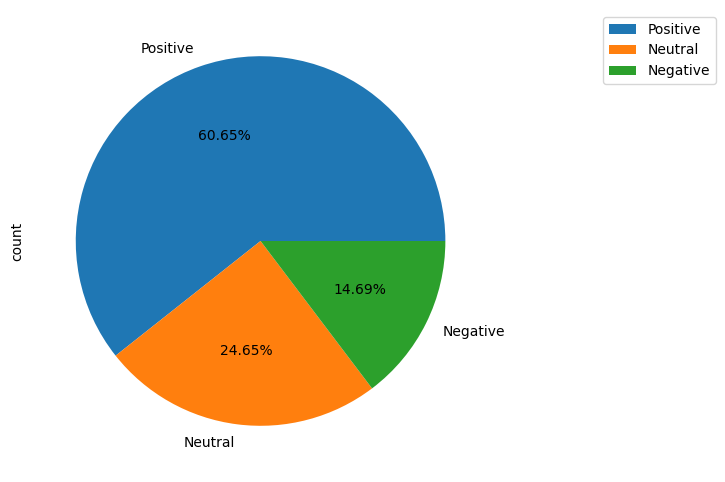

In [21]:
# pie chart with 'labels' column
plt.figure(figsize=(6,6))
explode=0.1,0
df.labels.value_counts().plot.pie(autopct='%1.2f%%',labels=['Positive','Neutral','Negative'])
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

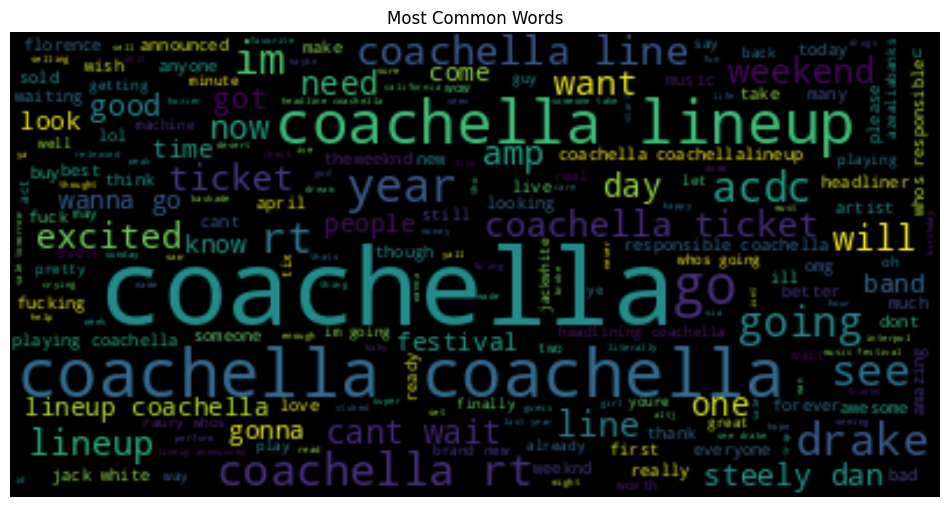

In [22]:
# Word Cloud
all_data = df['text'].to_string()
wordcloud = WordCloud().generate(all_data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Most Common Words')
plt.axis("off")

In [23]:
# Word Count - Top 20 most common words
temp_list = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in temp_list for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [24]:
text_lengths = df['text'].str.split().str.len()
text_lengths.value_counts().sort_values(ascending=False)

text
7     310
6     263
9     262
5     256
10    246
8     243
12    212
13    210
11    201
14    190
4     171
16    162
15    161
17    145
18    120
3     118
19    106
20     99
21     75
22     59
23     46
2      37
24     32
25     20
26     13
27      6
29      1
Name: count, dtype: int64

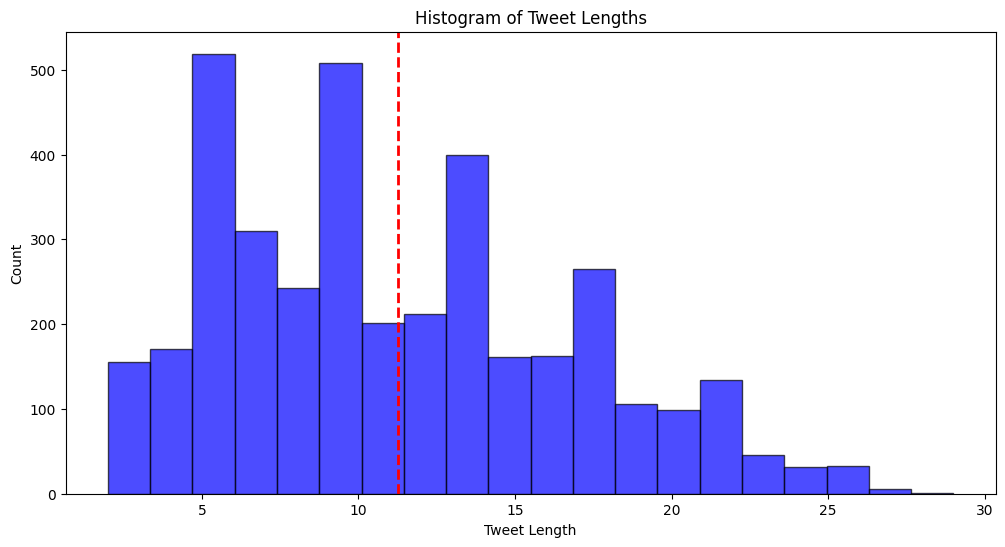

In [25]:
# Calculate the average
average_length = np.mean(text_lengths)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Using plt.hist to create a histogram with Matplotlib
ax.hist(text_lengths, bins=20, color="blue", edgecolor="black", alpha=0.7)

# Add average line
ax.axvline(average_length, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_length:.2f}')

ax.set_title('Histogram of Tweet Lengths')
ax.set_xlabel('Tweet Length')
ax.set_ylabel('Count')

# Display the plot
plt.show()

## Train Test Split

In [26]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])

In [27]:
train.head()

labels  \
3469  negative   
2956   neutral   
3584  negative   
3296  negative   
1011  positive   

                                                                                                                  text  
3469                                            i wish incubus or sonsofthesea would have been on the coachella lineup  
2956                     eric this is hilareous haha thatericalper this faux coachella lineup from coachella coachella  
3584                                   gotta get my abs back for coachella but i love eating and sleeping way too much  
3296  i hope it rains during drakes coachella set so everyone can talk about how they bathed in drakes tears coachella  
1011                                                                                omg the coachella lineup soexcited

In [28]:
eval.head()

labels  \
1576  positive   
3577  negative   
726   positive   
3197   neutral   
1     positive   

                                                                                             text  
1576  everyone is talking about the nflplayoffs and im just praying to see tupac at coachella rip  
3577                                    ok back to oogling and crying at this lineup tt coachella  
726                                   bring it coachella have my artist pass amp room ready to go  
3197                                 coachella lineup preview coachella coachella coachellalineup  
1                                              rt sudsybuddy wait this is absolute fire coachella

In [29]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (3011, 2), eval is (753, 2)


In [30]:
# Save split subsets
train.to_csv("/content/drive/MyDrive/Sentiment Analysis NLP/Dataset/train_subset.csv", index=False)
eval.to_csv("/content/drive/MyDrive/Sentiment Analysis NLP/Dataset/eval_subset.csv", index=False)

## Model Training and Fine Tuning

In [31]:
#login to huggingface with access token

notebook_login()

In [32]:
warnings.filterwarnings("ignore", category=FutureWarning)

roberta = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(roberta)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

## Label and Text Processing

In [33]:
# Function to tokenize data

def tokenize_data(example):
    return tokenizer(example['text'], max_length = 128, padding='max_length', truncation=True)

In [34]:
def transform_labels(labels):

    labels = labels['labels']
    num = 0
    if labels == 'negative':
        num = 0
    elif labels == 'neutral':
        num = 1
    elif labels == 'positive':
        num = 2

    return {'labels': num}

In [35]:
# Convert dataframes to datasets objects
train_dataset = Dataset.from_pandas(train)
eval_dataset = Dataset.from_pandas(eval)

# Create a DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'eval': eval_dataset
})

In [36]:
# Change the tweets to tokens that the model can use and remove the original columns

dataset = dataset.map(tokenize_data, batched=True)

remove_columns = ['labels', 'text']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

Map:   0%|          | 0/3011 [00:00<?, ? examples/s]

Map:   0%|          | 0/753 [00:00<?, ? examples/s]

Map:   0%|          | 0/3011 [00:00<?, ? examples/s]

Map:   0%|          | 0/753 [00:00<?, ? examples/s]

In [37]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 3011
    })
    eval: Dataset({
        features: ['labels', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 753
    })
})

In [38]:
remove_columns = ['__index_level_0__']
dataset = dataset.map(remove_columns=remove_columns)

Map:   0%|          | 0/3011 [00:00<?, ? examples/s]

Map:   0%|          | 0/753 [00:00<?, ? examples/s]

In [39]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 3011
    })
    eval: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 753
    })
})

### Balancing Target Classes

Since our target has imbalanced class weights (positive, neutral and negative dont have an equal number of samples), we want to give more weight to underrepresented classes and give less weight to classes with more samples.

In [40]:
# Define the labels
labels = dataset['train']['labels']

# Apply the compute class weight function to calculate the class weight
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)

The `balanced` option in compute_class_weight will calculate weights such that the classes are balanced.

In [41]:
# Preview class weights
class_weights, np.unique(labels)

(array([2.26561324, 1.35265049, 0.54965316]), array([0, 1, 2]))

### Initialize pre-trained model

In [42]:
# Define an instance of the pre-trained model with the number of labels
model = AutoModelForSequenceClassification.from_pretrained(roberta, num_labels=3)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Configure Training Parameters

In [43]:
# Configure the training parameters

training_args = TrainingArguments("./results",
    report_to = "none",
    num_train_epochs=3, # the number of times the model will repeat the training loop over the dataset
    load_best_model_at_end=True,
    eval_strategy='epoch',
    save_strategy='epoch',
)

In [44]:
# evaluation metrics
metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

### Define Custom Trainer

In [45]:
# Convert train data to PyTorch tensors to speed up training and add padding
#data_collator = DataCollatorWithPadding(tokenizer=tokenizer,padding=True, max_length='max_length', return_tensors='pt')

In [45]:
# Define Custom Trainer | Modify loss function and assign computed weights
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")

        # Forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Ensure logits and labels have compatible shapes and labels are of integer type
        #assert logits.shape[1] == self.model.config.num_labels, f"Logits shape {logits.shape} does not match number of labels {self.model.config.num_labels}"
        #assert labels.max() < self.model.config.num_labels, f"Labels contain values outside the valid range: {labels}"
        #assert labels.dtype == torch.long, f"Labels must be of type torch.long, but got {labels.dtype}"

        # Apply Class Weights
        class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(model.device)

        # Compute custom loss
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

### Training and Evaluation

In [46]:
# Instantiate the training and validation sets with random state of 10
train_dataset = dataset['train'].shuffle(seed=10)
eval_dataset = dataset['eval'].shuffle(seed=10)

In [47]:
# Instantiate the trainer for training
c_trainer = CustomTrainer(
                  model=model,
                  args=training_args,
                  train_dataset=train_dataset,
                  eval_dataset=eval_dataset,
                  tokenizer = tokenizer,
                  compute_metrics=compute_metrics,
)

In [48]:
# Launch the learning process: training
c_trainer.train()

TrainOutput(global_step=1131, training_loss=0.5951063626640988, metrics={'train_runtime': 352.5448, 'train_samples_per_second': 25.622, 'train_steps_per_second': 3.208, 'total_flos': 594175875584256.0, 'train_loss': 0.5951063626640988, 'epoch': 3.0})

In [49]:
# Launch the final evaluation
c_trainer.evaluate()

{'eval_loss': 0.7918271422386169,
 'eval_accuracy': 0.6945551128818062,
 'eval_runtime': 5.5263,
 'eval_samples_per_second': 136.257,
 'eval_steps_per_second': 17.19,
 'epoch': 3.0}

In [50]:
# Push model and tokenizer to HF Hub
model.push_to_hub("Azie88/Coachella_sentiment_analysis_roberta")
tokenizer.push_to_hub("Azie88/Coachella_sentiment_analysis_roberta")
dataset.push_to_hub("Azie88/Coachella_sentiment_analysis_roberta")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

This notebook is inspired by an article: [Fine-Tuning Bert for Tweets Classification ft. Hugging Face](https://medium.com/mlearning-ai/fine-tuning-bert-for-tweets-classification-ft-hugging-face-8afebadd5dbf)

## Inference
Let's test out our model with with some sample text

In [51]:
model_path = f"Azie88/Coachella_sentiment_analysis_roberta"

tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [52]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [58]:
# Input preprocessing
text = "2025 coachella lineup just dropped and XG one of the performers üò≠üî• #XGchella #XGATCoachella #Coachella2025"
text = preprocess(text)

In [59]:
# Tokenization and Class Prediction
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [60]:
print("Scores:", scores)
print("id2label Dictionary:", config.id2label)

Scores: [0.01247013 0.08499818 0.9025317 ]
id2label Dictionary: {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}


In [61]:
config.id2label = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

In [62]:
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) POSITIVE 0.9025
2) NEUTRAL 0.085
3) NEGATIVE 0.0125
